In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

llama_df = pd.read_csv('results_llama-3.csv')
gemma_df = pd.read_csv('results_gemma.csv')

# Calculating absolute differences with respect to the "zero-shot" column
# Calculating differences with respect to the "zero-shot" column
for col in llama_df.columns[2:]:  # Starting from the third column, as the first two are 'task' and 'zero-shot'
    llama_df[f'diff_{col}'] = llama_df[col] - llama_df['zero-shot']

for col in gemma_df.columns[2:]:  # Starting from the third column, as the first two are 'task' and 'zero-shot'
    gemma_df[f'diff_{col}'] = gemma_df[col] - gemma_df['zero-shot']

# Dropping original columns to keep only the absolute differences
llama_df_abs_diff = llama_df.drop(llama_df.columns[1:8], axis=1)
gemma_df_abs_diff = gemma_df.drop(gemma_df.columns[1:8], axis=1)

llama_df_abs_diff

llama_df.head()

,task,zero-shot,knowledge,RAG,fine-tune-zero-shot,fine-tune-knowledge,sociallite-instrucitons-zero-shot,reverse-instructions,diff_knowledge,diff_RAG,diff_fine-tune-zero-shot,diff_fine-tune-knowledge,diff_sociallite-instrucitons-zero-shot,diff_reverse-instructions
0,hayati_politeness,0.843750,0.656250,0.656250,0.843750,NaN,0.125000,0.687500,-0.187500,-0.187500,0.000000,NaN,-0.718750,-0.156250
1,contextual-abuse#PersonDirectedAbuse,0.670632,0.655019,0.460223,0.992565,NaN,0.179182,0.978439,-0.015613,-0.210409,0.321933,NaN,-0.491450,0.307807
2,implicit-hate#explicit_hate,0.664500,0.517000,0.447000,0.950500,NaN,0.210500,0.946500,-0.147500,-0.217500,0.286000,NaN,-0.454000,0.282000
3,complaints,0.805797,0.878261,0.808696,0.872464,NaN,0.130435,0.817391,0.072464,0.002899,0.066667,NaN,-0.675362,0.011594
4,hypo-l,0.665635,0.693498,0.535604,0.712074,NaN,0.325077,0.721362,0.027864,-0.130031,0.046440,NaN,-0.340557,0.055728


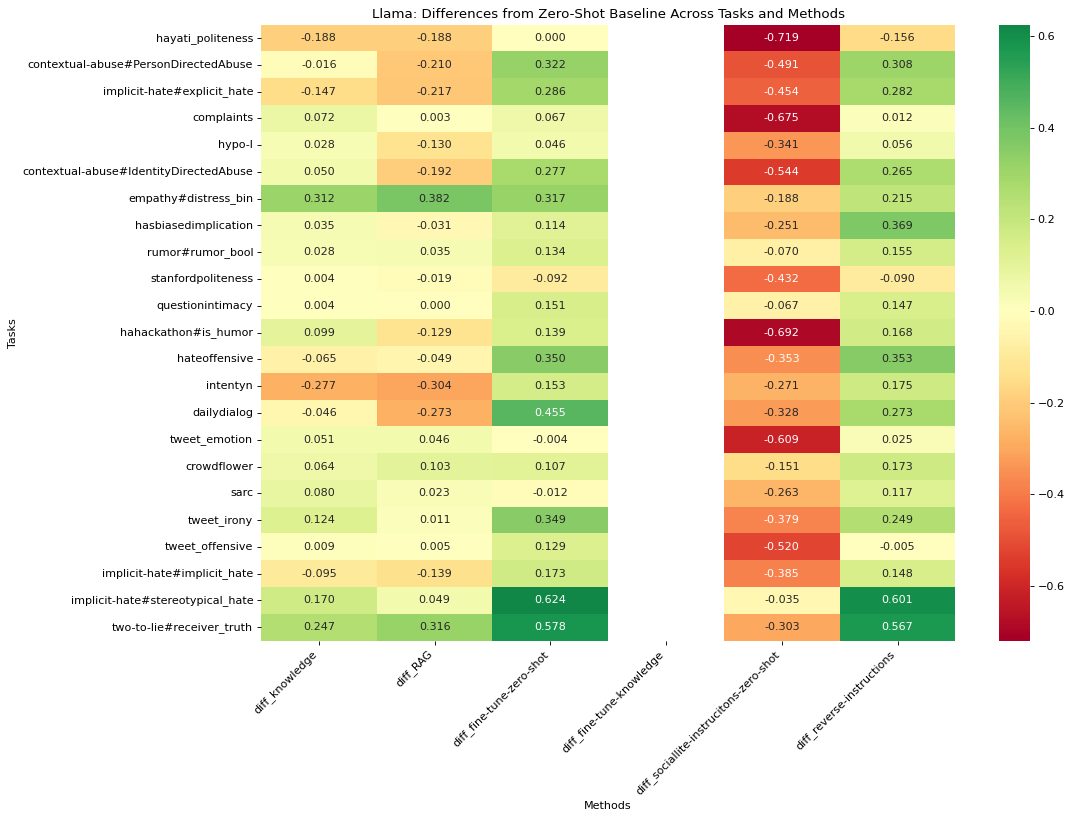

In [6]:
# Setting up the figure size and resolution for the heatmap
plt.figure(figsize=(14, 10), dpi=80)

# Creating the heatmap with annotations to show the difference values
# sns.heatmap(llama_df_abs_diff.drop('task', axis=1).set_index(llama_df_abs_diff['task']), annot=True, fmt=".3f", cmap="coolwarm")
sns.heatmap(llama_df_abs_diff.drop('task', axis=1).set_index(llama_df_abs_diff['task']), annot=True, fmt=".3f", cmap="RdYlGn", center=0)

# Adding title and labels for clarity
plt.title('Llama: Differences from Zero-Shot Baseline Across Tasks and Methods')
plt.xlabel('Methods')
plt.ylabel('Tasks')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the heatmap
plt.show()

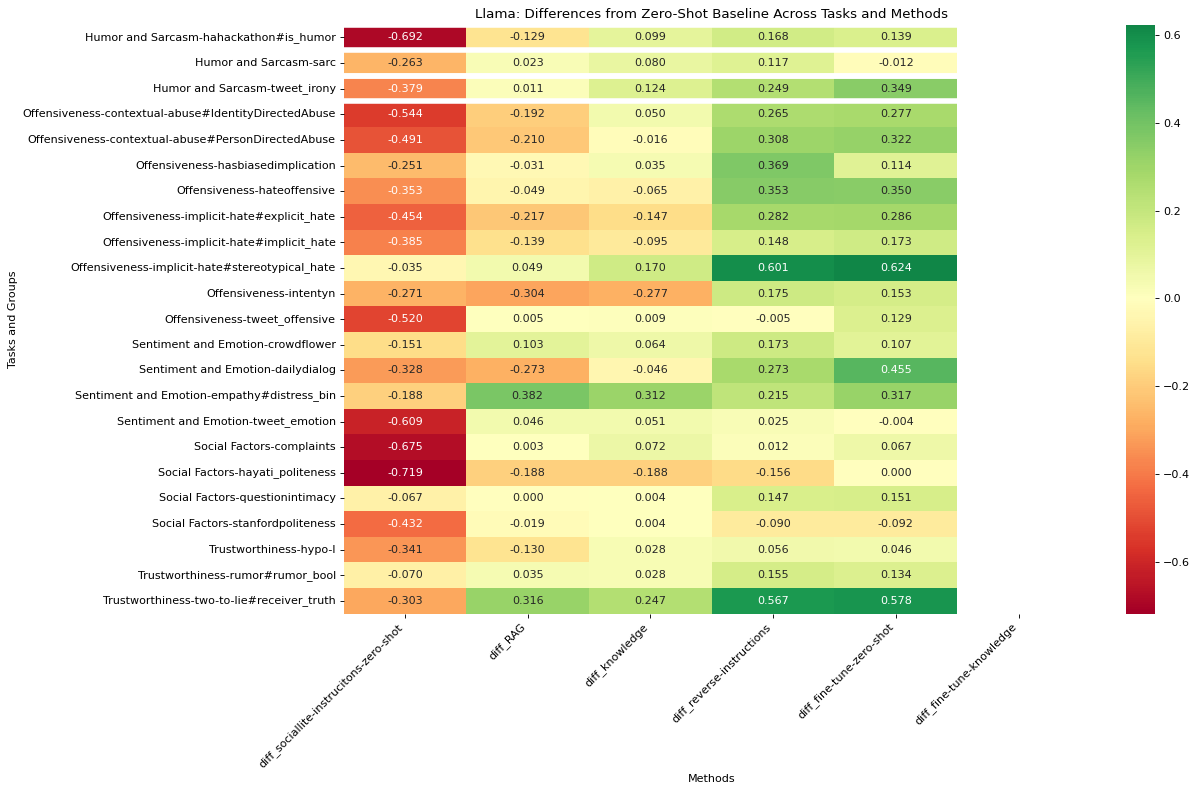

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Assuming 'llama_df_abs_diff' is your DataFrame and it's already loaded

groups = {
    'Humor and Sarcasm': [
        'hahackathon#is_humor', 
        'sarc', 
        'tweet_irony'
    ],
    'Offensiveness': [
        'contextual-abuse#IdentityDirectedAbuse',
        'contextual-abuse#PersonDirectedAbuse',
        'hasbiasedimplication',
        'hateoffensive',
        'implicit-hate#explicit_hate',
        'implicit-hate#implicit_hate',
        'implicit-hate#stereotypical_hate',
        'intentyn',
        'tweet_offensive'
    ],
    'Sentiment and Emotion': [
        'crowdflower',
        'dailydialog',
        'empathy#distress_bin',
        'tweet_emotion'
    ],
    'Social Factors': [
        'complaints',
        'hayati_politeness',
        'questionintimacy',
        'stanfordpoliteness'
    ],
    'Trustworthiness': [
        'hypo-l',
        'rumor#rumor_bool',
        'two-to-lie#receiver_truth'
    ]
}

# Assigning a group to each task
task_group = {}
for group, tasks in groups.items():
    for task in tasks:
        task_group[task] = group

# Adding a 'Group' column to the DataFrame
llama_df_abs_diff['Group'] = llama_df_abs_diff['task'].map(task_group)

# Calculating the mean for each method and sorting the DataFrame columns
method_means = llama_df_abs_diff.drop(['task', 'Group'], axis=1).mean()
sorted_columns = method_means.sort_values().index.tolist()

# Sorting the DataFrame rows first by Group and then within each group
sorted_df = llama_df_abs_diff.set_index(['Group', 'task'])[sorted_columns]
sorted_df = sorted_df.sort_index(level=0, sort_remaining=True)

# Assign colors to each group for the side color bar
group_colors = {
    'Humor and Sarcasm': 'gold',
    'Offensiveness': 'lightgreen',
    'Sentiment and Emotion': 'lightcoral',
    'Social Factors': 'lightskyblue',
    'Trustworthiness': 'plum'
}

# Create a list of colors for each row in the DataFrame
row_colors = sorted_df.index.get_level_values('Group').map(group_colors)

# Creating the heatmap
plt.figure(figsize=(16, 10), dpi=80)  # Adjusted figure size for additional visual elements
ax = sns.heatmap(sorted_df, annot=True, fmt=".3f", cmap="RdYlGn", center=0)

# Adding title and labels
plt.title('Llama: Differences from Zero-Shot Baseline Across Tasks and Methods')
plt.xlabel('Methods')
plt.ylabel('Tasks and Groups')

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding horizontal lines to visually separate the groups
group_boundaries = sorted_df.index.get_level_values('Group').to_series().drop_duplicates().index
for boundary in group_boundaries:
    plt.axhline(boundary[0], color='white', lw=5)  # Adjust color and linewidth as needed

# Adjusting the layout to make room for the group labels if necessary
plt.tight_layout()

plt.show()


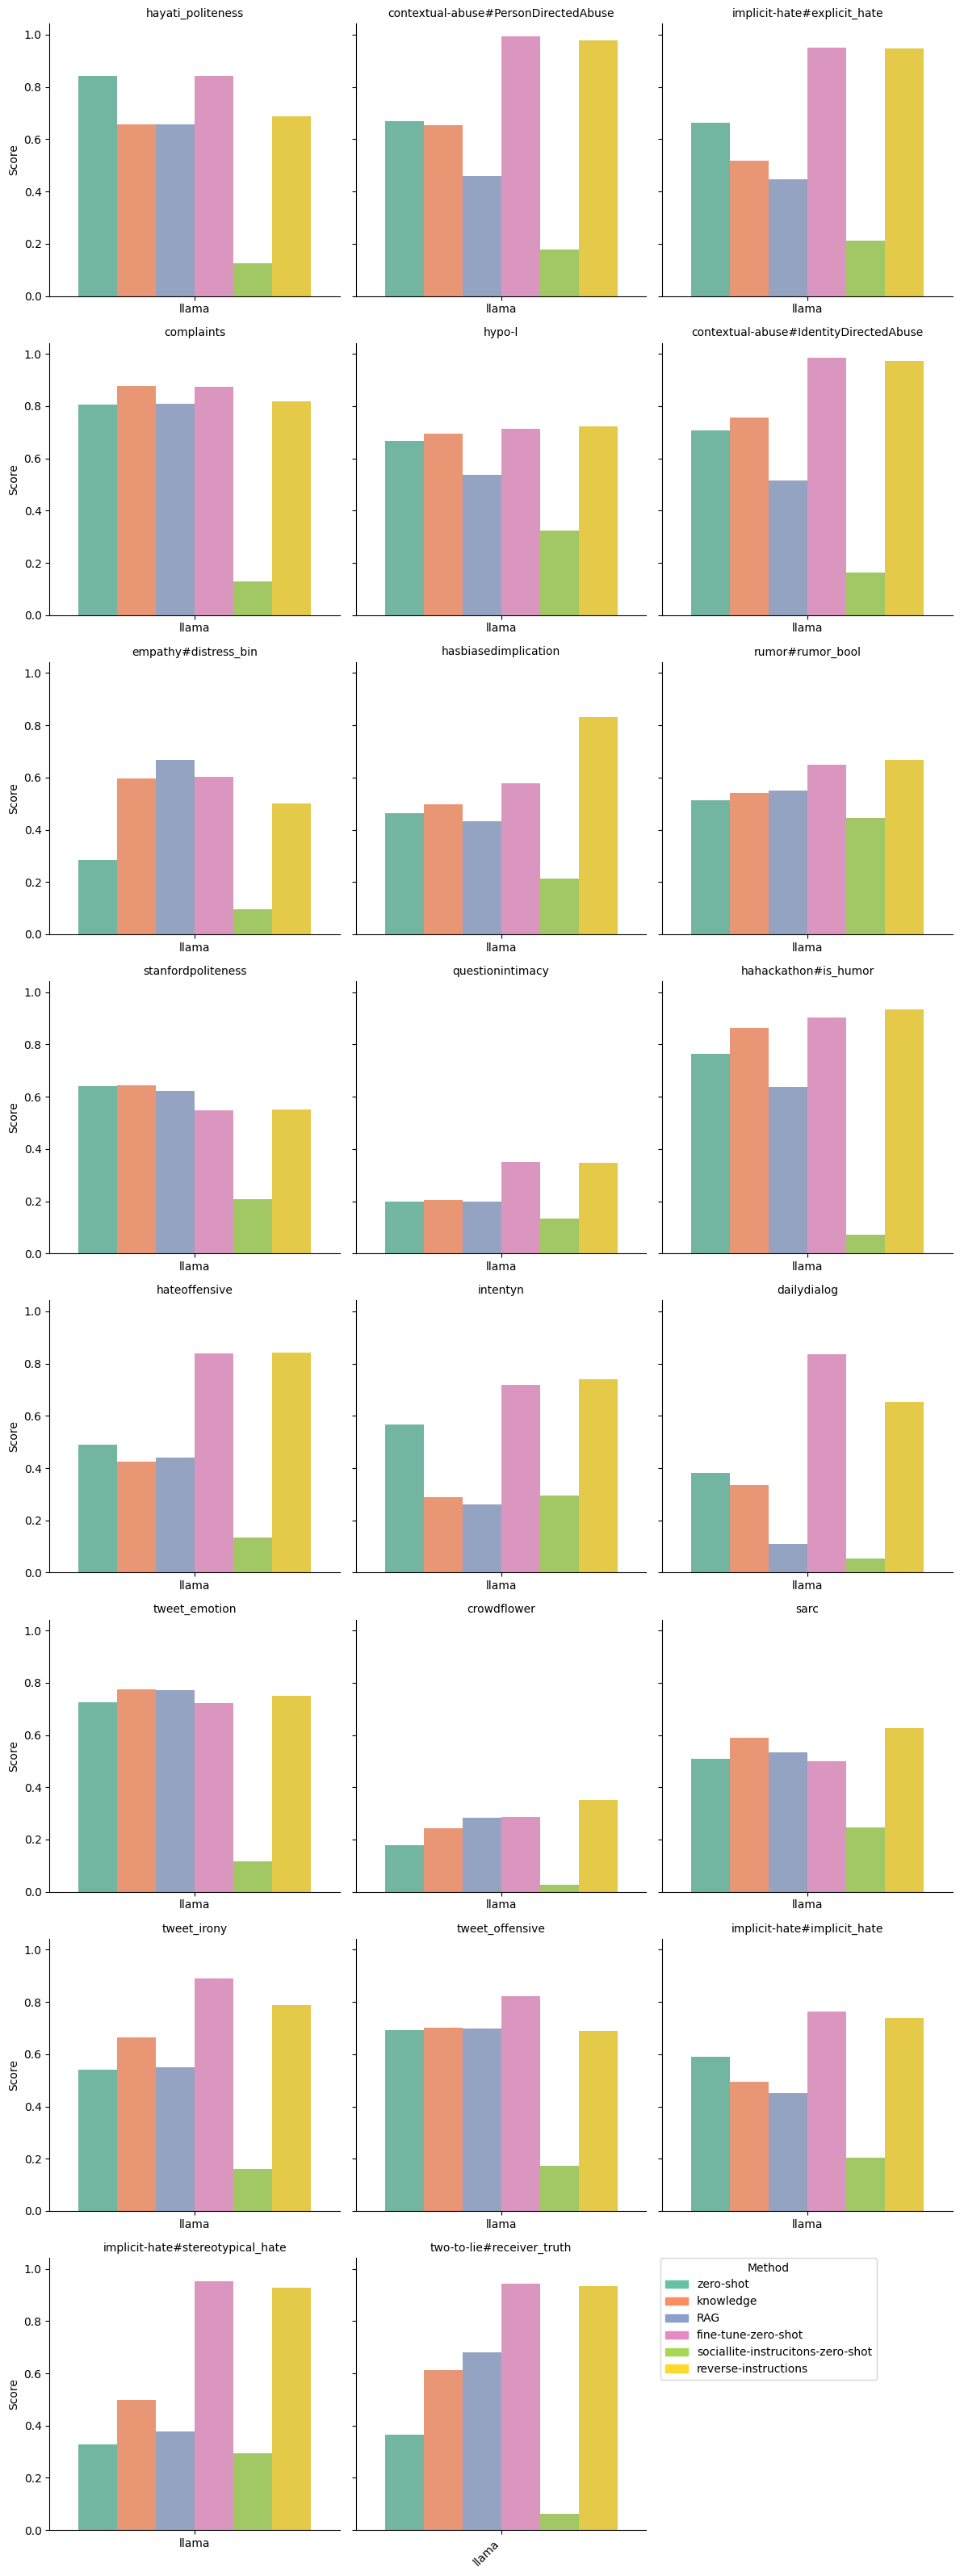

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Step 1: Concatenate the DataFrames with a source identifier
llama_df['source'] = 'llama'
gemma_df['source'] = 'gemma'
combined_df = pd.concat([llama_df])

# Step 2: Filter out the difference columns if they are present
columns_to_keep = ['task', 'source', 'zero-shot', 'knowledge', 'RAG', 'fine-tune-zero-shot', 'sociallite-instrucitons-zero-shot', 'reverse-instructions']
combined_df = combined_df[columns_to_keep]

# Step 3: Prepare the data for visualization
# Melt the DataFrame to long format for seaborn plotting
long_df = combined_df.melt(id_vars=['task', 'source'], var_name='method', value_name='score')

# Step 4: Plot the small multiples
# Set up the FacetGrid to create a grid of plots, one for each task
g = sns.FacetGrid(long_df, col='task', col_wrap=3, sharex=False, sharey=True, height=4)

# Map the seaborn barplot to each subplot in the grid
g.map_dataframe(sns.barplot, x='source', y='score', hue='method', palette='Set2')

# Set axis labels and titles
g.set_axis_labels("", "Score")
g.set_titles("{col_name}")

# Adjust the x-axis labels and layout for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Custom Legend Handling
# Create patches for the legend
methods = long_df['method'].unique()
colors = sns.color_palette('Set2', n_colors=len(methods))
patches = [mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)]

# Place the legend outside the last subplot in the grid
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., title='Method')

# Show the plot
plt.show()

# Now grouped

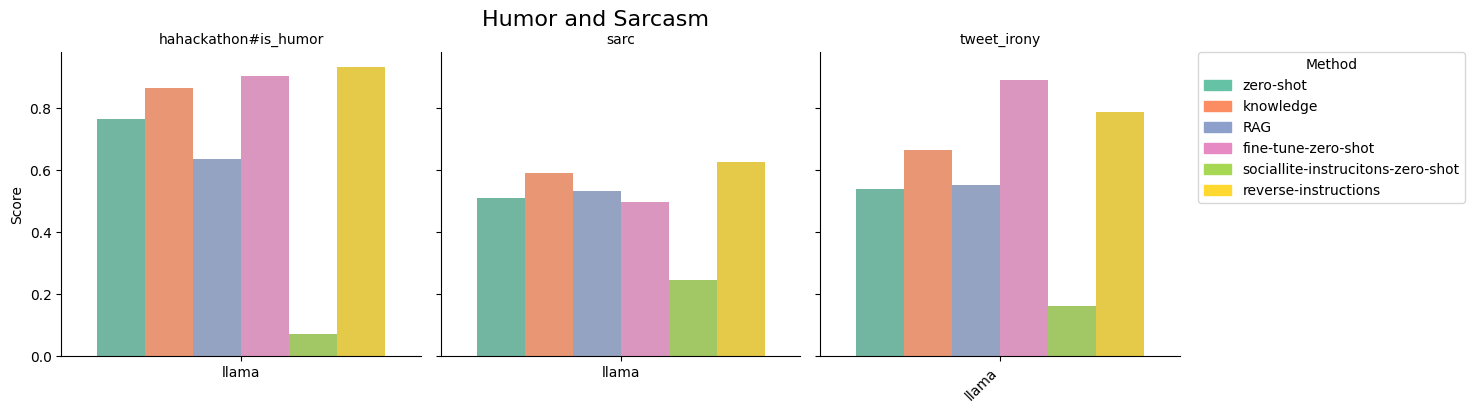

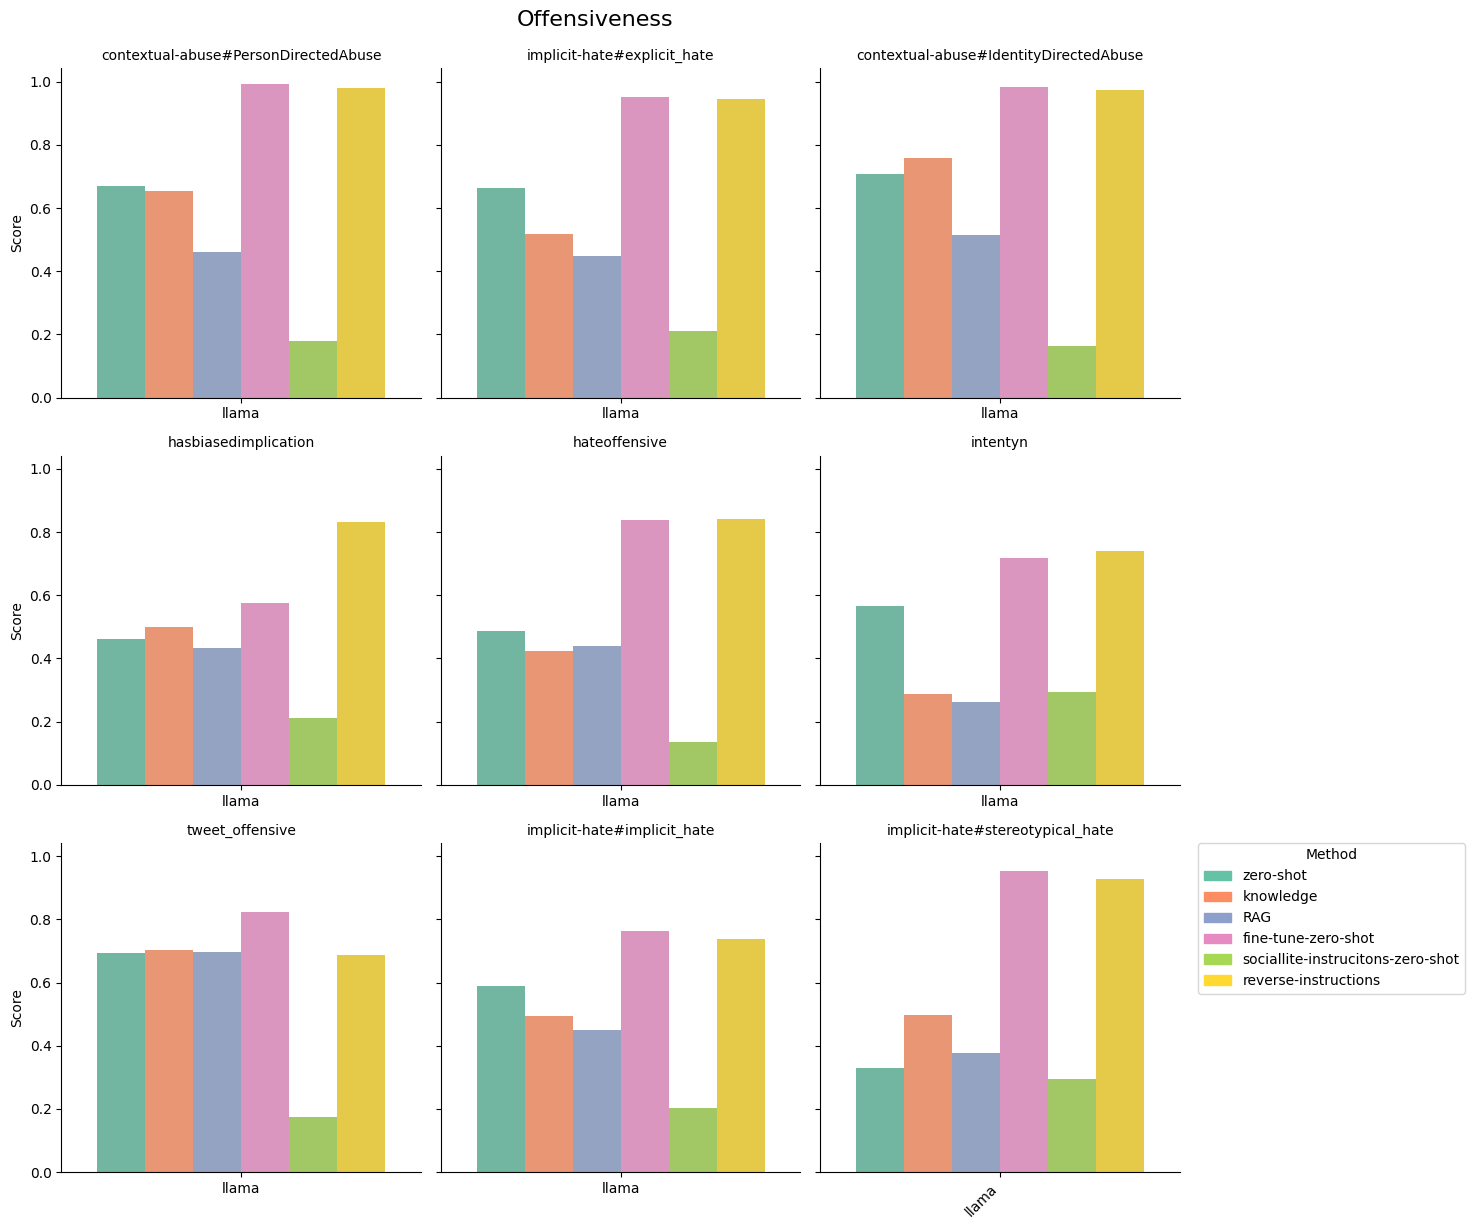

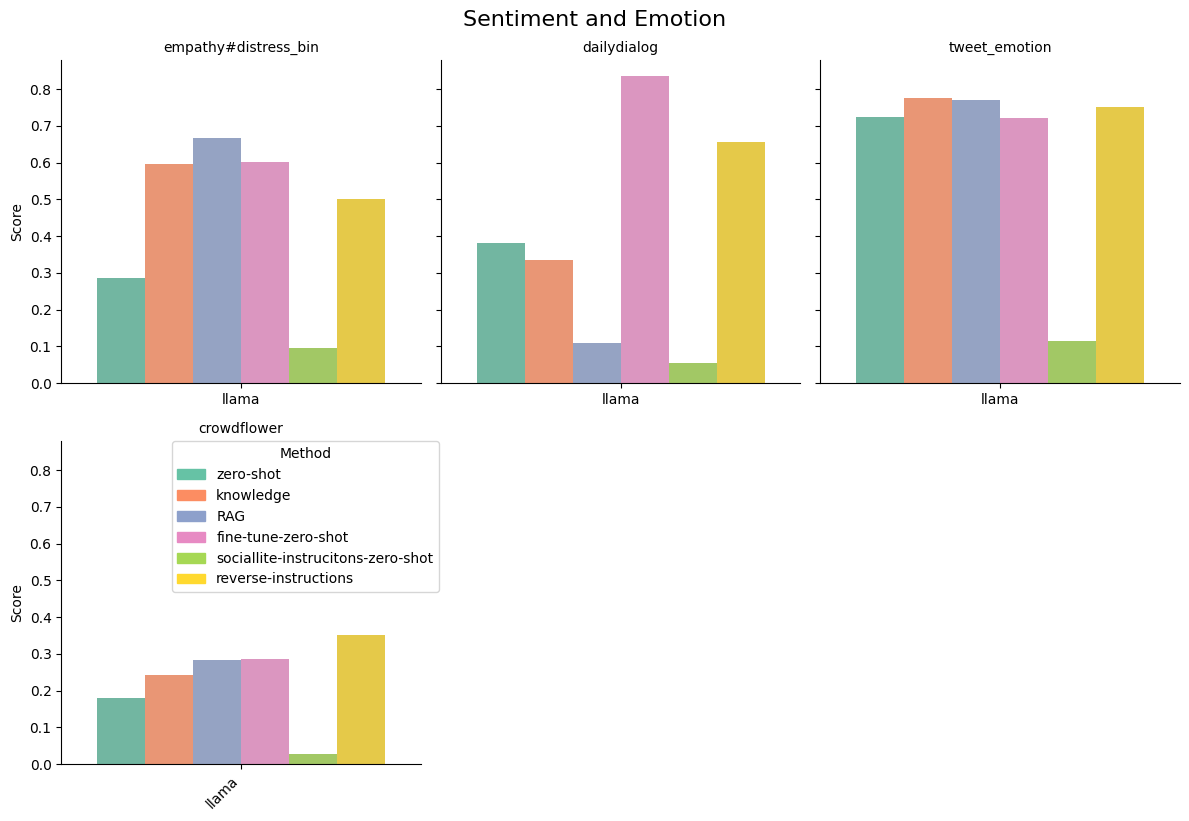

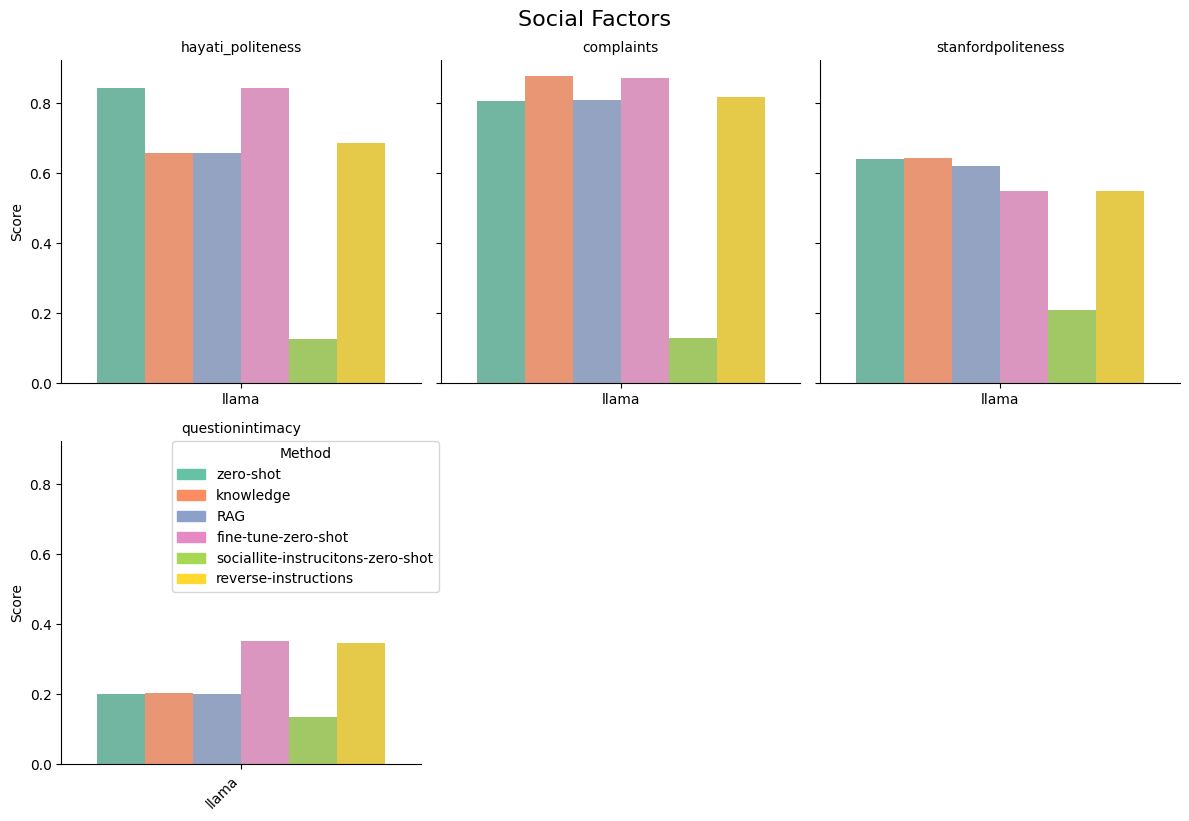

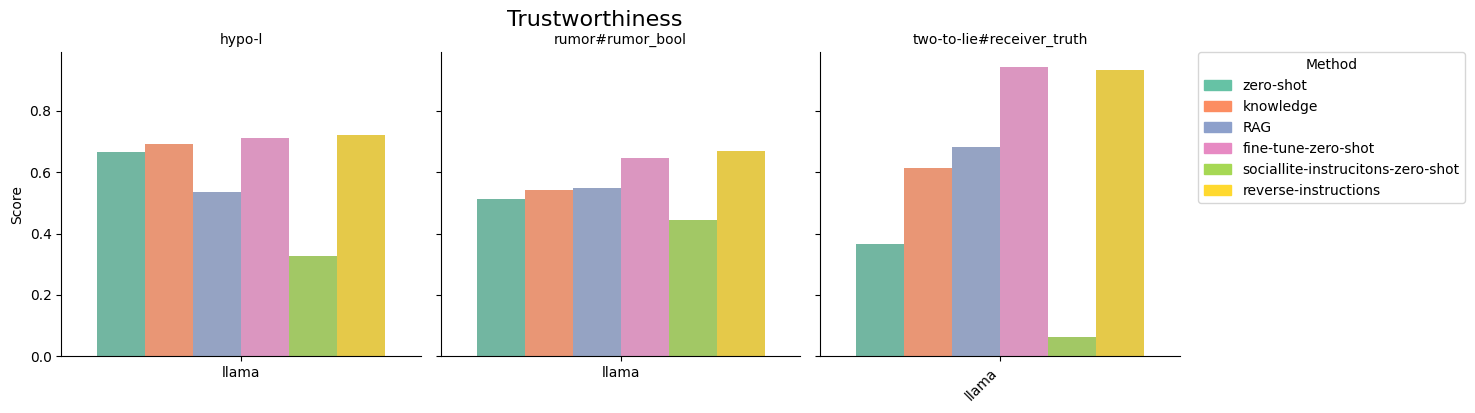

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming llama_df and gemma_df are already defined and loaded

# Define groups and their tasks
groups = {
    'Humor and Sarcasm': [
        'hahackathon#is_humor', 
        'sarc', 
        'tweet_irony'
    ],
    'Offensiveness': [
        'contextual-abuse#IdentityDirectedAbuse',
        'contextual-abuse#PersonDirectedAbuse',
        'hasbiasedimplication',
        'hateoffensive',
        'implicit-hate#explicit_hate',
        'implicit-hate#implicit_hate',
        'implicit-hate#stereotypical_hate',
        'intentyn',
        'tweet_offensive'
    ],
    'Sentiment and Emotion': [
        'crowdflower',
        'dailydialog',
        'empathy#distress_bin',
        'tweet_emotion'
    ],
    'Social Factors': [
        'complaints',
        'hayati_politeness',
        'questionintimacy',
        'stanfordpoliteness'
    ],
    'Trustworthiness': [
        'hypo-l',
        'rumor#rumor_bool',
        'two-to-lie#receiver_truth'
    ]
}


# Iterating over each group and plotting
for group_name, tasks in groups.items():
    # Step 1: Filter the combined DataFrame for the current group's tasks
    filtered_df = combined_df[combined_df['task'].isin(tasks)]

    # Step 2: Melt the DataFrame to long format for seaborn plotting
    long_df = filtered_df.melt(id_vars=['task', 'source'], var_name='method', value_name='score')

    # Step 3: Set up the FacetGrid and plot
    g = sns.FacetGrid(long_df, col='task', col_wrap=3, sharex=False, sharey=True, height=4)
    g.map_dataframe(sns.barplot, x='source', y='score', hue='method', palette='Set2')
    g.set_axis_labels("", "Score").set_titles("{col_name}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Custom Legend Handling
    methods = long_df['method'].unique()
    colors = sns.color_palette('Set2', n_colors=len(methods))
    patches = [mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(methods)]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., title='Method')

    g.fig.suptitle(group_name, fontsize=16, y=1.02)

    # Show the plot
    plt.show()


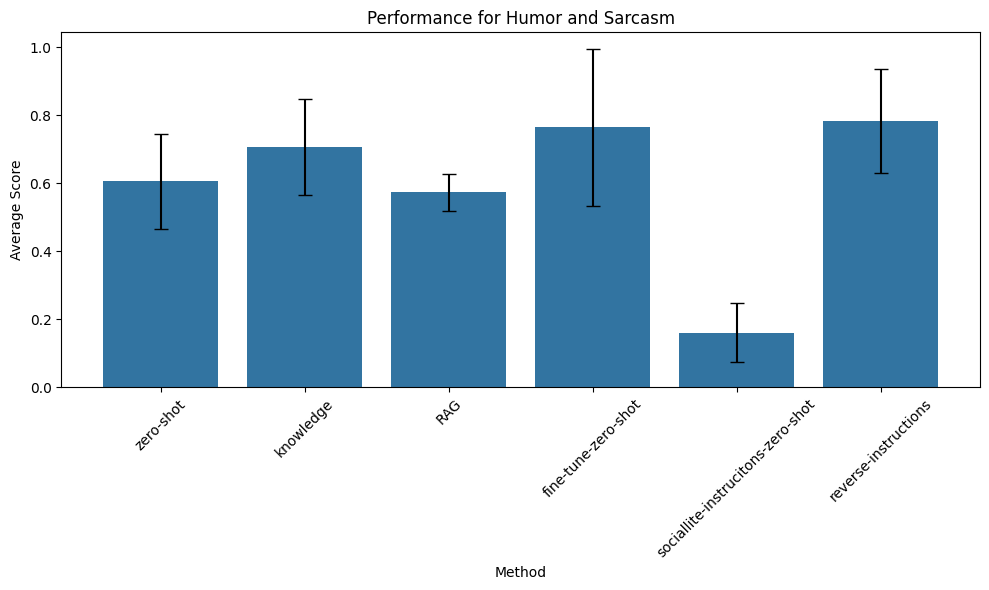

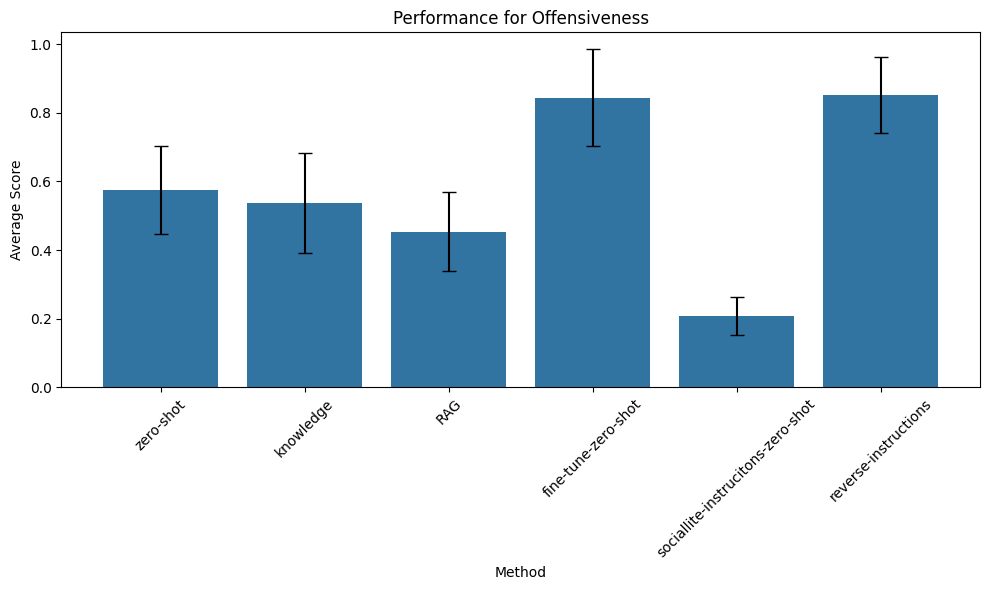

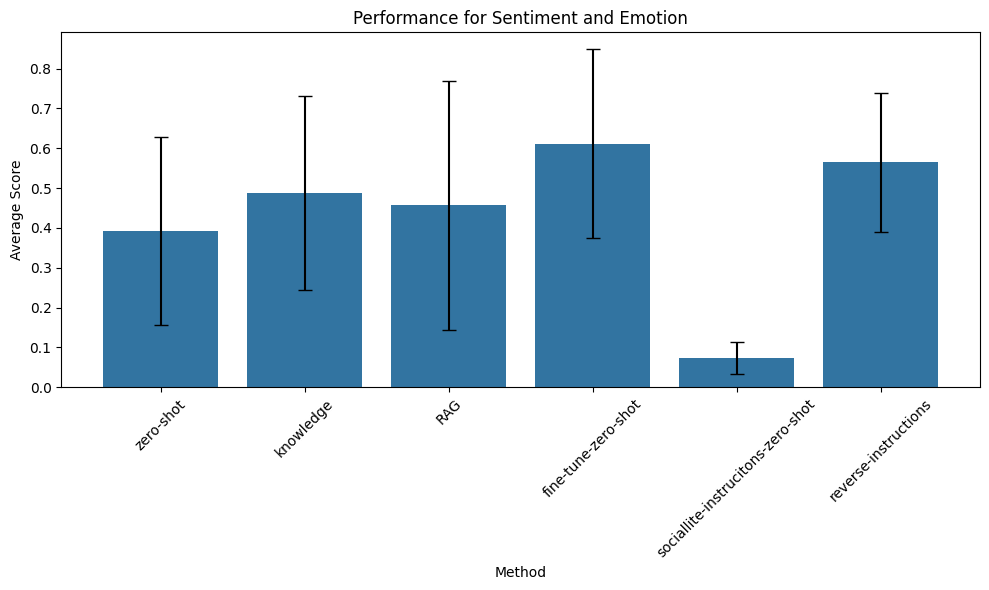

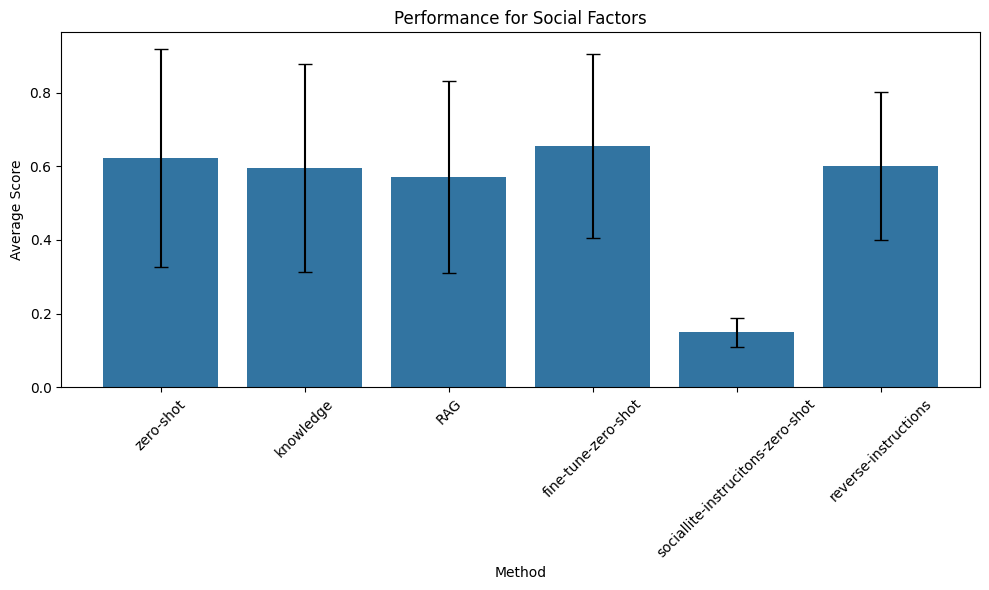

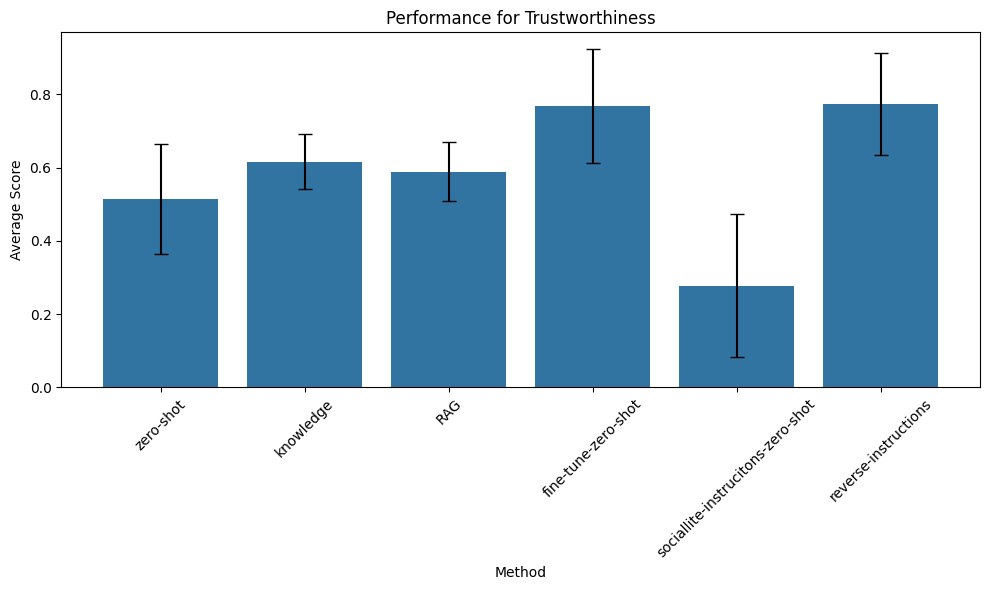

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your groups and their tasks
groups = {
    'Humor and Sarcasm': ['hahackathon#is_humor', 'sarc', 'tweet_irony'],
    'Offensiveness': ['contextual-abuse#IdentityDirectedAbuse', 'contextual-abuse#PersonDirectedAbuse', 'hasbiasedimplication', 'hateoffensive', 'implicit-hate#explicit_hate', 'implicit-hate#implicit_hate', 'implicit-hate#stereotypical_hate', 'intentyn', 'tweet_offensive'],
    'Sentiment and Emotion': ['crowdflower', 'dailydialog', 'empathy#distress_bin', 'tweet_emotion'],
    'Social Factors': ['complaints', 'hayati_politeness', 'questionintimacy', 'stanfordpoliteness'],
    'Trustworthiness': ['hypo-l', 'rumor#rumor_bool', 'two-to-lie#receiver_truth']
}

# Assuming 'df' is your DataFrame containing the data
for group_name, tasks in groups.items():
    # Filter the DataFrame for the current group's tasks
    group_df = combined_df[combined_df['task'].isin(tasks)]
    
    # Calculate the mean and std for each method in the group
    mean_df = group_df.drop(columns=['task', 'source']).mean().reset_index()
    std_df = group_df.drop(columns=['task', 'source']).std().reset_index()
    mean_df.columns = ['method', 'mean']
    std_df.columns = ['method', 'std']
    
    # Merge mean and std dataframes
    stats_df = pd.merge(mean_df, std_df, on='method')

    # Plotting
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=stats_df, x='method', y='mean')
    plt.errorbar(x=stats_df['method'], y=stats_df['mean'], yerr=stats_df['std'], fmt='none', c='k', capsize=5)
    
    plt.title(f'Performance for {group_name}')
    plt.ylabel('Average Score')
    plt.xlabel('Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Radar plot

                                   task  zero-shot  knowledge       RAG  \
0                     hayati_politeness   0.843750   0.656250  0.656250   
1  contextual-abuse#PersonDirectedAbuse   0.670632   0.655019  0.460223   
2           implicit-hate#explicit_hate   0.664500   0.517000  0.447000   
3                            complaints   0.805797   0.878261  0.808696   
4                                hypo-l   0.665635   0.693498  0.535604   

   fine-tune-zero-shot  fine-tune-knowledge  \
0             0.843750                  NaN   
1             0.992565                  NaN   
2             0.950500                  NaN   
3             0.872464                  NaN   
4             0.712074                  NaN   

   sociallite-instrucitons-zero-shot  reverse-instructions  
0                           0.125000              0.687500  
1                           0.179182              0.978439  
2                           0.210500              0.946500  
3                     

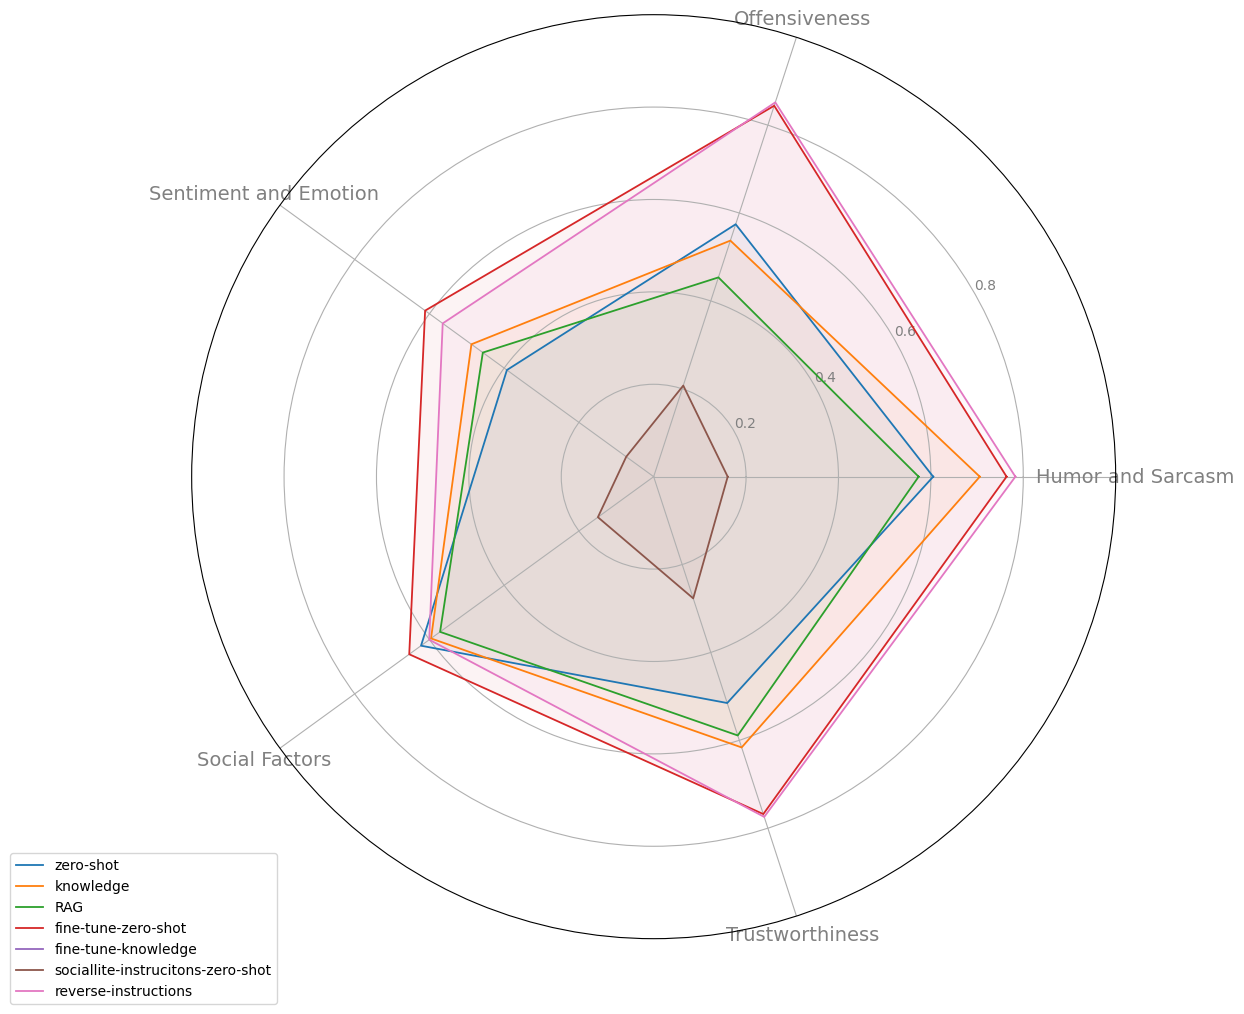

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your groups and their tasks
groups = {
    'Humor and Sarcasm': ['hahackathon#is_humor', 'sarc', 'tweet_irony'],
    'Offensiveness': ['contextual-abuse#IdentityDirectedAbuse', 'contextual-abuse#PersonDirectedAbuse', 'hasbiasedimplication', 'hateoffensive', 'implicit-hate#explicit_hate', 'implicit-hate#implicit_hate', 'implicit-hate#stereotypical_hate', 'intentyn', 'tweet_offensive'],
    'Sentiment and Emotion': ['crowdflower', 'dailydialog', 'empathy#distress_bin', 'tweet_emotion'],
    'Social Factors': ['complaints', 'hayati_politeness', 'questionintimacy', 'stanfordpoliteness'],
    'Trustworthiness': ['hypo-l', 'rumor#rumor_bool', 'two-to-lie#receiver_truth']
}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

llama_df_2 = llama_df.loc[:, ~llama_df.columns.str.startswith('diff')]

llama_df_2 = llama_df_2.drop('source', axis=1)

print(llama_df_2.head())
# Step 1: Calculate the average for each group
group_averages = {group: llama_df_2[llama_df_2['task'].isin(tasks)].iloc[:, 1:].mean() for group, tasks in groups.items()}

# Convert the dictionary to a DataFrame for easier manipulation
group_averages_df = pd.DataFrame(group_averages)

# Step 2: Prepare data for the radar plot
# Number of variables we're plotting.
num_vars = len(group_averages_df.columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
values = group_averages_df.values
values = np.concatenate((values, values[:,[0]]), axis=1)
angles += angles[:1]

# Step 3: Create the radar plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], group_averages_df.columns, color='grey', size=14)

# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
plt.ylim(0,1)

# Plot data
for idx, col in enumerate(group_averages_df.index):
    values = group_averages_df.loc[col].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.3, linestyle='solid', label=col)
    ax.fill(angles, values, alpha=0.05)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

### Interactive radar chart

In [13]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from matplotlib import cm

# Function to calculate group averages based on selected methods
def calculate_group_averages(selected_methods):
    group_averages = {}
    for group, tasks in groups.items():
        group_df = llama_df_2[llama_df_2['task'].isin(tasks)]
        group_averages[group] = group_df[selected_methods].mean()
    group_averages_df = pd.DataFrame(group_averages)
    return group_averages_df

# Radar chart creation function adapted for Streamlit and Plotly
# @st.cache(allow_output_mutation=True)
def make_radar_chart(group_averages_df):
    fig = go.Figure()
    cmap = cm.get_cmap('tab20b')
    angles = list(group_averages_df.index)
    angles.append(angles[0])
    
    for i, col in enumerate(group_averages_df.columns):
        data = group_averages_df[col].values.tolist()
        data.append(data[0])  # Complete the loop
        fig.add_trace(go.Scatterpolar(
            r=data,
            theta=angles,
            mode='lines+markers',
            line_color='rgba' + str(cmap(i / len(group_averages_df.columns))),
            name=col))
        
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=True
    )
    return fig

# Streamlit app
st.title('Radar Chart of Group Averages')

# Let users select methods
methods = llama_df_2.columns[1:]  # Exclude 'task' column
# Convert the pandas Index object to a list for the 'default' parameter
selected_methods = st.multiselect('Select methods to display:', options=methods, default=methods.tolist())

if selected_methods:
    # Calculate group averages based on selected methods
    group_averages_df = calculate_group_averages(selected_methods)
    
    # Create and display the radar chart
    fig = make_radar_chart(group_averages_df)
    st.plotly_chart(fig)
else:
    st.write("Please select at least one method to display.")

/var/folders/sb/8gwgylyj46s_kvtq52d0bwdc0000gn/T/ipykernel_23990/4225946503.py:22: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [22]:
import pandas as pd

df = pd.read_csv("results_by_model.csv", index_col=0)

groups = {
    'Humor & Sarcasm': [
        'hahackathon#is_humor', 
        'sarc', 
        'tweet_irony'
    ],
    'Offensiveness': [
        'contextual-abuse#IdentityDirectedAbuse',
        'contextual-abuse#PersonDirectedAbuse',
        'hasbiasedimplication',
        'hateoffensive',
        'implicit-hate#explicit_hate',
        'implicit-hate#implicit_hate',
        'implicit-hate#stereotypical_hate',
        'intentyn',
        'tweet_offensive'
    ],
    'Sentiment & Emotion': [
        'crowdflower',
        'dailydialog',
        'empathy#distress_bin',
        'tweet_emotion'
    ],
    'Social Factors': [
        'complaints',
        'hayati_politeness',
        'questionintimacy',
        'stanfordpoliteness'
    ],
    'Trustworthiness': [
        'hypo-l',
        'rumor#rumor_bool',
        'two-to-lie#receiver_truth'
    ]
}

In [23]:
df

,hayati_politeness,alias,contextual-abuse#PersonDirectedAbuse,implicit-hate#explicit_hate,complaints,hypo-l,contextual-abuse#IdentityDirectedAbuse,empathy#distress_bin,hasbiasedimplication,rumor#rumor_bool,...,intentyn,dailydialog,tweet_emotion,crowdflower,sarc,tweet_irony,tweet_offensive,implicit-hate#implicit_hate,implicit-hate#stereotypical_hate,two-to-lie#receiver_truth
model_name,,,,,,,,,,,,,,,,,,,,,
hlab/SocialiteLlama_predictions_zero-shot.json,0.12500,Socialite,0.179182,0.2105,0.130435,0.325077,0.163569,0.096774,0.2120,0.443662,...,0.2950,0.0540,0.115412,0.0275,0.2470,0.160714,0.173256,0.2035,0.2935,0.062234
meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json,0.28125,Llama-2 Zero-Shot,0.102602,0.0895,0.437681,0.269350,0.075836,0.048387,0.2445,0.281690,...,0.0895,0.1670,0.449683,0.2145,0.4000,0.312500,0.411628,0.0845,0.0465,0.490196
meta-llama/Meta-Llama-3-8B-Instruct_predictions_zero-shot.json,0.84375,Llama-3 Zero-Shot,0.670632,0.6645,0.805797,0.665635,0.707807,0.284946,0.4630,0.514085,...,0.5655,0.3820,0.724842,0.1790,0.5105,0.539541,0.693023,0.5890,0.3285,0.365729
meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json,0.68750,Llama-2 RAG,0.182156,0.1255,0.779710,0.557276,0.255019,0.553763,0.5735,0.887324,...,0.4625,0.1065,0.679803,0.2240,0.4510,0.366071,0.723256,0.1080,0.7245,0.899403
meta-llama/Meta-Llama-3-8B-Instruct_predictions_knowledge.json,0.65625,Llama-3 Knowledge,0.655019,0.5170,0.878261,0.693498,0.757621,0.596774,0.4985,0.542254,...,0.2890,0.3355,0.775510,0.2425,0.5905,0.663265,0.702326,0.4935,0.4985,0.612958
meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json,0.43750,Llama-2 Knowledge,0.479554,0.1415,0.649275,0.402477,0.515242,0.564516,0.4255,0.605634,...,0.1570,0.5605,0.622801,0.2875,0.4915,0.497449,0.576744,0.2020,0.1635,0.430520
meta-llama/Meta-Llama-3-8B-Instruct_predictions_RAG.json,0.65625,Llama-3 RAG,0.460223,0.4470,0.808696,0.535604,0.515985,0.666667,0.4320,0.549296,...,0.2610,0.1090,0.770584,0.2820,0.5335,0.551020,0.697674,0.4500,0.3780,0.682012
AndersGiovanni/social-llama-3-8b-instructions_predictions_zero-shot.json,0.68750,Social-Llama-3 Instructions,0.978439,0.9465,0.817391,0.721362,0.973234,0.500000,0.8325,0.669014,...,0.7405,0.6550,0.750176,0.3525,0.6275,0.788265,0.688372,0.7370,0.9290,0.932651
AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json,0.37500,Social-Llama-2 Zero-Shot,0.104833,0.1385,0.562319,0.349845,0.101859,0.172043,0.3900,0.457746,...,0.2510,0.1535,0.497537,0.2350,0.4745,0.464286,0.533721,0.2675,0.1500,0.549020


In [24]:
# Calculate the average performance for each group
group_averages = {}
for alias, row in df.iterrows():
    alias_name = row['alias']
    group_averages[alias_name] = {}
    for group_name, tasks in groups.items():
        # Check if all tasks in the group are present in the DataFrame
        if all(task in df.columns for task in tasks):
            # Calculate the mean of the tasks in the group for the current row
            group_averages[alias_name][group_name] = row[tasks].mean()
        else:
            # If not all tasks are present, assign NaN
            group_averages[alias_name][group_name] = np.nan

# Convert the dictionary to a DataFrame for easier viewing
group_averages_df = pd.DataFrame(group_averages).T

# Display the DataFrame
group_averages_df

,Humor & Sarcasm,Offensiveness,Sentiment & Emotion,Social Factors,Trustworthiness
Socialite,0.160238,0.207329,0.073421,0.149220,0.276991
Llama-2 Zero-Shot,0.390500,0.183039,0.219893,0.356188,0.347079
Llama-3 Zero-Shot,0.605014,0.574490,0.392697,0.622440,0.515149
Llama-2 RAG,0.426357,0.419992,0.391017,0.584139,0.781334
Llama-3 Knowledge,0.705922,0.537263,0.487571,0.595674,0.616237
Llama-2 Knowledge,0.516316,0.331882,0.508829,0.482452,0.479544
Llama-3 RAG,0.573507,0.453525,0.457063,0.571439,0.588970
Social-Llama-3 Instructions,0.782922,0.851887,0.564419,0.600456,0.774343
Social-Llama-2 Zero-Shot,0.500929,0.276180,0.264520,0.436499,0.452204
Social-Llama-2 Instructions,0.467252,0.525605,0.437279,0.357699,0.570884


In [25]:
df_2 = df
# I want the order of the transposed dataframe to be like this:
order = ["hlab/SocialiteLlama_predictions_zero-shot.json", 
         #
         "meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json", 
         "meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json", 
         "meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json", 
         "AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json", 
         "AndersGiovanni/social-llama-7b-instructions_predictions_zero-shot.json", 
         #
         "meta-llama/Meta-Llama-3-8B-Instruct_predictions_zero-shot.json", 
         "meta-llama/Meta-Llama-3-8B-Instruct_predictions_knowledge.json", 
         "meta-llama/Meta-Llama-3-8B-Instruct_predictions_RAG.json",
         "AndersGiovanni/social-llama-3-8b-beta_predictions_zero-shot.json", 
         "AndersGiovanni/social-llama-3-8b-instructions_predictions_zero-shot.json"]
df_2 = df_2.reindex(order)
df_2.head()
# df_2.T.to_csv("results_by_model_transposed.csv")

,hayati_politeness,alias,contextual-abuse#PersonDirectedAbuse,implicit-hate#explicit_hate,complaints,hypo-l,contextual-abuse#IdentityDirectedAbuse,empathy#distress_bin,hasbiasedimplication,rumor#rumor_bool,...,intentyn,dailydialog,tweet_emotion,crowdflower,sarc,tweet_irony,tweet_offensive,implicit-hate#implicit_hate,implicit-hate#stereotypical_hate,two-to-lie#receiver_truth
model_name,,,,,,,,,,,,,,,,,,,,,
hlab/SocialiteLlama_predictions_zero-shot.json,0.12500,Socialite,0.179182,0.2105,0.130435,0.325077,0.163569,0.096774,0.2120,0.443662,...,0.2950,0.0540,0.115412,0.0275,0.2470,0.160714,0.173256,0.2035,0.2935,0.062234
meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json,0.28125,Llama-2 Zero-Shot,0.102602,0.0895,0.437681,0.269350,0.075836,0.048387,0.2445,0.281690,...,0.0895,0.1670,0.449683,0.2145,0.4000,0.312500,0.411628,0.0845,0.0465,0.490196
meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json,0.43750,Llama-2 Knowledge,0.479554,0.1415,0.649275,0.402477,0.515242,0.564516,0.4255,0.605634,...,0.1570,0.5605,0.622801,0.2875,0.4915,0.497449,0.576744,0.2020,0.1635,0.430520
meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json,0.68750,Llama-2 RAG,0.182156,0.1255,0.779710,0.557276,0.255019,0.553763,0.5735,0.887324,...,0.4625,0.1065,0.679803,0.2240,0.4510,0.366071,0.723256,0.1080,0.7245,0.899403
AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json,0.37500,Social-Llama-2 Zero-Shot,0.104833,0.1385,0.562319,0.349845,0.101859,0.172043,0.3900,0.457746,...,0.2510,0.1535,0.497537,0.2350,0.4745,0.464286,0.533721,0.2675,0.1500,0.549020


In [26]:
df_t = df_2.T
df_t.head()

model_name,hlab/SocialiteLlama_predictions_zero-shot.json,meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json,meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json,meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json,AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json,AndersGiovanni/social-llama-7b-instructions_predictions_zero-shot.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_zero-shot.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_knowledge.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_RAG.json,AndersGiovanni/social-llama-3-8b-beta_predictions_zero-shot.json,AndersGiovanni/social-llama-3-8b-instructions_predictions_zero-shot.json
hayati_politeness,0.125,0.28125,0.4375,0.6875,0.375,0.25,0.84375,0.65625,0.65625,0.84375,0.6875
alias,Socialite,Llama-2 Zero-Shot,Llama-2 Knowledge,Llama-2 RAG,Social-Llama-2 Zero-Shot,Social-Llama-2 Instructions,Llama-3 Zero-Shot,Llama-3 Knowledge,Llama-3 RAG,Social-Llama-3 Zero-Shot,Social-Llama-3 Instructions
contextual-abuse#PersonDirectedAbuse,0.179182,0.102602,0.479554,0.182156,0.104833,0.052045,0.670632,0.655019,0.460223,0.992565,0.978439
implicit-hate#explicit_hate,0.2105,0.0895,0.1415,0.1255,0.1385,0.799,0.6645,0.517,0.447,0.9505,0.9465
complaints,0.130435,0.437681,0.649275,0.77971,0.562319,0.55942,0.805797,0.878261,0.808696,0.872464,0.817391


In [27]:
# Sort the rows based on the groups. Each group is a list of tasks.
sorted_df = pd.DataFrame()
for group_name, tasks in groups.items():
    group_df = df_t[df_t.index.isin(tasks)]
    sorted_df = pd.concat([sorted_df, group_df])
sorted_df.head()
# Round all values to 3 decimal places
sorted_df = sorted_df.round(3)
sorted_df.head()
# sorted_df.to_csv("results_by_model_transposed_sorted.csv")

model_name,hlab/SocialiteLlama_predictions_zero-shot.json,meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json,meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json,meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json,AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json,AndersGiovanni/social-llama-7b-instructions_predictions_zero-shot.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_zero-shot.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_knowledge.json,meta-llama/Meta-Llama-3-8B-Instruct_predictions_RAG.json,AndersGiovanni/social-llama-3-8b-beta_predictions_zero-shot.json,AndersGiovanni/social-llama-3-8b-instructions_predictions_zero-shot.json
hahackathon#is_humor,0.073,0.459,0.56,0.462,0.564,0.548,0.765,0.864,0.636,0.904,0.933
sarc,0.247,0.4,0.4915,0.451,0.4745,0.216,0.5105,0.5905,0.5335,0.4985,0.6275
tweet_irony,0.160714,0.3125,0.497449,0.366071,0.464286,0.637755,0.539541,0.663265,0.55102,0.889031,0.788265
contextual-abuse#PersonDirectedAbuse,0.179182,0.102602,0.479554,0.182156,0.104833,0.052045,0.670632,0.655019,0.460223,0.992565,0.978439
implicit-hate#explicit_hate,0.2105,0.0895,0.1415,0.1255,0.1385,0.799,0.6645,0.517,0.447,0.9505,0.9465


In [28]:
llama_2 = ["hlab/SocialiteLlama_predictions_zero-shot.json", 
         #
         "meta-llama/Llama-2-7b-chat-hf_predictions_zero-shot.json", 
         "meta-llama/Llama-2-7b-chat-hf_predictions_knowledge.json", 
         "meta-llama/Llama-2-7b-chat-hf_predictions_RAG.json", 
         "AndersGiovanni/social-llama-7b-beta_predictions_zero-shot.json", 
         "AndersGiovanni/social-llama-7b-instructions_predictions_zero-shot.json", 
         ]

llama_2_aliases = ["SocialiteLlama", 
         #
         "Zero-shot", 
         "AI Knowledge", 
         "RAG", 
         "Fine-tune", 
         "Reverse Instructions Fine-tune", 
         ]

llama_3 = ["hlab/SocialiteLlama_predictions_zero-shot.json",
        "meta-llama/Meta-Llama-3-8B-Instruct_predictions_zero-shot.json", 
        "meta-llama/Meta-Llama-3-8B-Instruct_predictions_knowledge.json", 
        "meta-llama/Meta-Llama-3-8B-Instruct_predictions_RAG.json",
        "AndersGiovanni/social-llama-3-8b-beta_predictions_zero-shot.json", 
        "AndersGiovanni/social-llama-3-8b-instructions_predictions_zero-shot.json"]

llama_3_aliases = ["SocialiteLlama",
        "Zero-shot", 
        "AI Knowledge", 
        "RAG", 
        "Fine-tune", 
        "Reverse Instructions Fine-tune"]

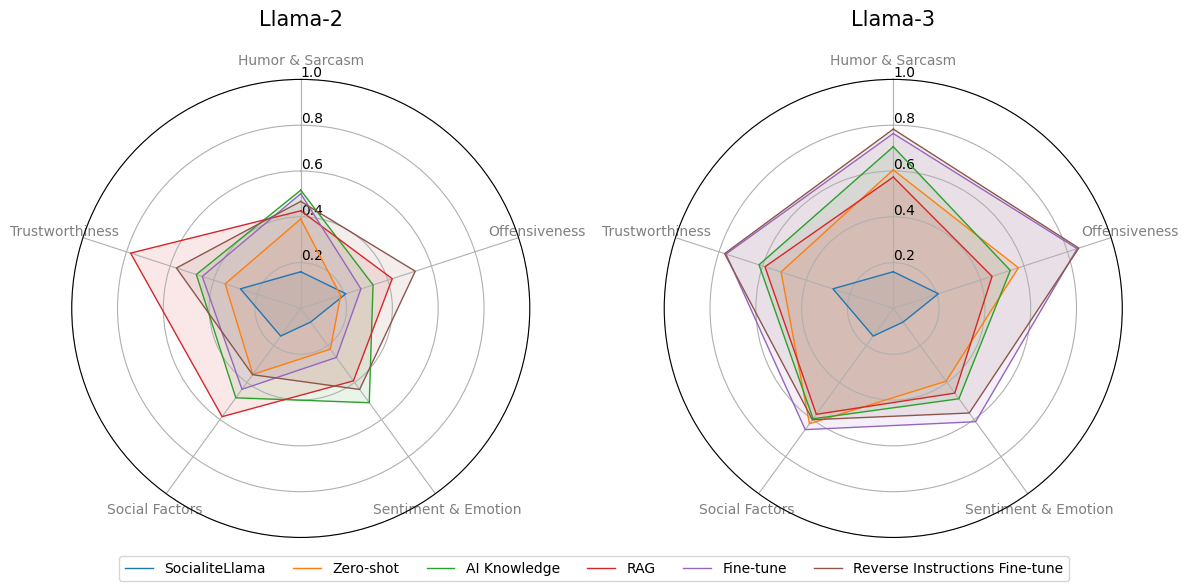

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to calculate average scores for each group
def calculate_group_averages(models, df):
    group_averages = {}
    for model in models:
        model_averages = {}
        for group_name, tasks in groups.items():
            # Filter the DataFrame for tasks in the current group and select the current model
            group_df = df.loc[tasks, [model]]
            # Calculate the mean for the current model and current group
            model_averages[group_name] = group_df.mean().values[0]
        group_averages[model] = model_averages
    return pd.DataFrame(group_averages)

# Calculate group averages for llama_2 and llama_3
averages_llama_2 = calculate_group_averages(llama_2, df_t)
averages_llama_3 = calculate_group_averages(llama_3, df_t)

# Function to create a radar chart
def create_radar_chart(data, ax, title, aliases):
    labels = data.index
    num_vars = len(labels)

    # Compute angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='grey', size=10)


    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 1)

    # Plot data and add legend entries
    for idx, (column, alias) in enumerate(zip(data.columns, aliases)):
        values = data[column].values.tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=alias)
        ax.fill(angles, values, alpha=0.1)

    ax.set_title(title, size=15, y=1.1)

# Calculate group averages for llama_2 and llama_3
averages_llama_2 = calculate_group_averages(llama_2, df_t)
averages_llama_3 = calculate_group_averages(llama_3, df_t)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(12, 6))

# Create radar charts
create_radar_chart(averages_llama_2, ax1, 'Llama-2', llama_2_aliases)
create_radar_chart(averages_llama_3, ax2, 'Llama-3', llama_3_aliases)

# Ensure consistent legend for both plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(llama_2_aliases))

plt.tight_layout()
plt.show()